In [2]:
import numpy as np

In [3]:
# load the data files
data = np.load('data/data.npy')
target = np.load('data/target.npy')

In [4]:
print(data.shape, target.shape)

(167, 2500) (167,)


In [5]:
from sklearn.svm import SVC # importing the SVm
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=132, whiten=True, random_state=42)
svc = SVC(kernel='rbf')

model = make_pipeline(pca, svc)

In [6]:
# splitting to train & test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [7]:
# train the model
model.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=132, random_state=42, whiten=True)),
                ('svc', SVC())])

In [8]:
# Get predictions
y_predic = model.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_predic)
print(acc)

0.5588235294117647


In [10]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_predic, target_names=['Bill Gates', 'Elon Musk', 'Steve Jobs'])

print(cls_report)

              precision    recall  f1-score   support

  Bill Gates       0.00      0.00      0.00        12
   Elon Musk       1.00      0.57      0.73         7
  Steve Jobs       0.50      1.00      0.67        15

    accuracy                           0.56        34
   macro avg       0.50      0.52      0.46        34
weighted avg       0.43      0.56      0.44        34



D:\NEW_W_ORDER\projects\face-recognition-pipeline-with-SVM-and-PCA\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NEW_W_ORDER\projects\face-recognition-pipeline-with-SVM-and-PCA\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NEW_W_ORDER\projects\face-recognition-pipeline-with-SVM-and-PCA\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matrix = confusion_matrix(y_test, y_predic)
print(matrix)

[[ 0  0 12]
 [ 0  4  3]
 [ 0  0 15]]


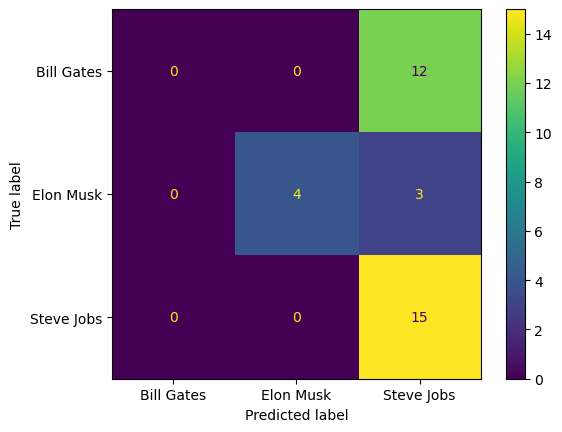

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['Bill Gates', 'Elon Musk', 'Steve Jobs'])
disp.plot()

In [13]:
import joblib

joblib.dump(model, 'SVM-Face_Recognition.sav')

['SVM-Face_Recognition.sav']